### Linear and Polynomial Regression
Use the data set regression-data-set.csv for this example. Make sure you review the example “Polynomial Regression in Python” starting on page 77 of GSML before you start this.   
#### (a) Read the data set into a data frame.   

In [2]:
import pandas as pd
df = pd.read_csv('regression-data-set.csv')

In [3]:
# check the dataframe
print(df.head())
print('- ' * 20)
print(df.info())

      x     y
0  1.00  3.14
1  1.14  3.17
2  1.28  3.09
3  1.42  3.08
4  1.57  3.09
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


#### (b) Convert the x and y columns into numpy arrays

In [4]:
import numpy as np
X = np.array(df.x)
y = np.array(df.y)
print('X shape = {}, y shape = {}'.format(X.shape, y.shape))

X shape = (100,), y shape = (100,)


#### (c) Make a scatter plot of y as a function of x

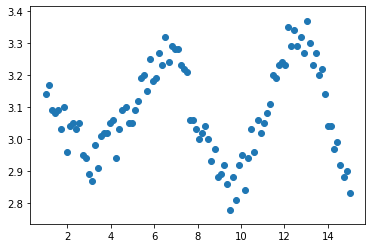

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

#### d) Write a function that will perform polynomial fits of multiple degrees 
(say 1, 2, 3, ..., n) for a single train/test split of the data and   
returns some measure of the means square error (or another error measure that you like).   
You can either calculate the error yourself or use a built in function.

In [6]:
from sklearn.model_selection import train_test_split

""" Split then fit a dataset into a polynomial regression
    Return a list of mean squared errors of the coresponding degree of the polinomial fit
    X: the predictors in numpy array of the dataset 
    y: the labels in numpy array of the dataset
    max_degree: the largest polynomial degree the user want to fit
"""
def split_and_fit(X, y, max_degree):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    mean_squared_errors = fit_polynomials(X_train, y_train, X_test, y_test, max_degree)
    
    return mean_squared_errors

""" Fit a dataset into a polynomial regression
    Return a list of mean squared errors of the coresponding degree of the polynomial fit
    X_train, X_test: the training and testing predictors in numpy array
    y_train, y_test: the training and testing labels in numpy array
    max_degree: the largest polynomial degree the user want to fit
"""
def fit_polynomials(X_train, y_train, X_test, y_test, max_degree): 
    test_size =len(X_test)
    MSE = []
    for p in range(max_degree):
        coef   = np.polyfit(X_train, y_train, p + 1) 
        y_pred = np.polyval(coef, X_test) 
        MSE.append(sum((y_test - y_pred) ** 2) / test_size)
    
    return(np.array(MSE).T)

### (e) Perform 100 train/test splits and collect the errors as a function of degree. 
You will have 100 errors for each degree.

In [7]:
max_degree = 15
n_splits = 100
MSE_list = []

for k in range(n_splits):
    MSE_list.append(split_and_fit(X, y, max_degree))

In [10]:
df_MSE = pd.DataFrame(np.array(MSE_list))
round(df_MSE.head(), 5)      

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.01985,0.02085,0.02148,0.01905,0.00645,0.00645,0.00256,0.00243,0.00231,0.00246,0.00246,0.00248,0.00268,0.00269,0.00291
1,0.02753,0.02742,0.02717,0.02391,0.00792,0.00791,0.00253,0.00220,0.00186,0.00185,0.00197,0.00202,0.00193,0.00203,0.00200
2,0.01909,0.01891,0.01873,0.01871,0.00362,0.00368,0.00225,0.00191,0.00291,0.00290,0.00297,0.00306,0.00269,0.00268,0.00268
3,0.01688,0.01681,0.01736,0.01795,0.00436,0.00435,0.00256,0.00219,0.00190,0.00189,0.00188,0.00188,0.00202,0.00201,0.00201
4,0.02554,0.02537,0.02752,0.02605,0.01027,0.01141,0.00278,0.00351,0.00231,0.00226,0.00230,0.00248,0.00190,0.00226,0.00350


In [8]:
df_MSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
dtypes: float64(15)
memory usage: 11.8 KB


In [12]:
round(df_MSE.describe(), 3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.021,0.021,0.022,0.021,0.009,0.010,0.003,0.003,0.003,0.004,0.004,0.022,0.032,0.010,0.148
std,0.005,0.005,0.005,0.007,0.006,0.018,0.003,0.001,0.007,0.013,0.017,0.198,0.292,0.064,1.419
min,0.013,0.013,0.013,0.012,0.003,0.003,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
25%,0.017,0.017,0.018,0.017,0.006,0.006,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
50%,0.021,0.021,0.021,0.020,0.008,0.008,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.003
75%,0.025,0.025,0.026,0.024,0.009,0.010,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.004
max,0.034,0.035,0.036,0.076,0.067,0.184,0.030,0.006,0.070,0.131,0.172,1.982,2.923,0.644,14.196


#### (f) For each degree, find the mean and standard deviation of the error.

In [10]:
MSE_mean_list = np.array(df_MSE.mean())
MSE_std_list  = np.array(df_MSE.std())

In [11]:
MSE_mean_list

array([0.02062   , 0.02115062, 0.02151531, 0.0206421 , 0.00849588,
       0.00912672, 0.00291205, 0.00280383, 0.00228725, 0.00235629,
       0.0025433 , 0.00281364, 0.00272447, 0.0031467 , 0.00371567])

In [12]:
MSE_std_list

array([0.00427497, 0.00446087, 0.00471396, 0.00429456, 0.00226186,
       0.00388548, 0.00078539, 0.00092736, 0.00048922, 0.00055602,
       0.00108575, 0.00156873, 0.00122544, 0.00151626, 0.00308938])

#### (g) Make a plot (you may want to use a logarithmic scale on the y-axis) of the error as a function of degree. 
(As an example, see the middle line, with the dots, below.)
#### (h) On the same plot, add the mean plus/minus one sigma.

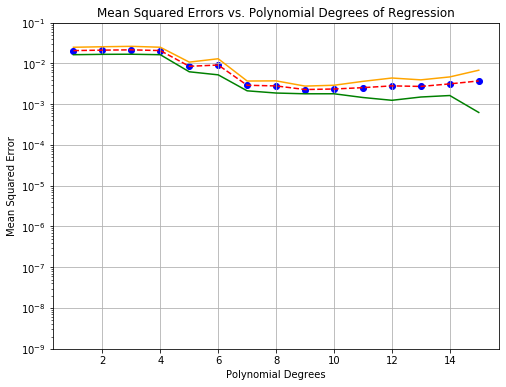

In [13]:
x = list(range(1, max_degree + 1))
plt.yscale('log')
plt.ylim(10**-9, 10**-1)
plt.title('Mean Squared Errors vs. Polynomial Degrees of Regression')
plt.xlabel('Polynomial Degrees')
plt.ylabel('Mean Squared Error')
plt.scatter(x, MSE_mean_list, color='blue')
plt.plot(x, MSE_mean_list, color='red', linestyle='dashed')
plt.plot(x, MSE_mean_list - MSE_std_list, color='green')
plt.plot(x, MSE_mean_list + MSE_std_list, color='orange')
plt.grid()
plt.gcf().set_size_inches(8, 6)
plt.show()

#### (i) Using your own judgment, determine your favorite degree fit.
*The best polynomial degree to fit = 8 because:   
___the mean squared error begins reaching the lowest value___     
___the mean of the mean squared error is closed to the mean plus/minus one sigma___         
___8 is selected instead of 9 to keep the model some level of flexibility___

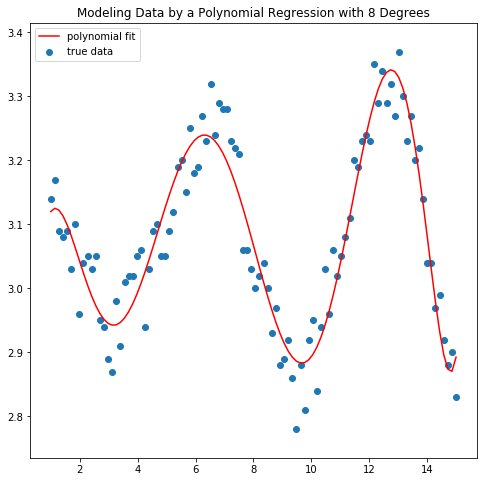

In [14]:
selected_degree = 8
coef = np.polyfit(X, y, selected_degree)
Xp = np.linspace(np.min(X), np.max(X), X.size)
yp = np.polyval(coef, Xp)

plt.scatter(X, y, label='true data')
plt.plot(Xp, yp, label='polynomial fit', color='red')
plt.title('Modeling Data by a Polynomial Regression with {} Degrees'.format(selected_degree))
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()